# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%208-%20KNN/python/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# K-Nearest Neigbors (KNN) - Classification

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [20]:
rand_state = 1000

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Social_Network_Ads.csv')

In [22]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
# first we look at target variable proportions:
pd.crosstab(df['Purchased'],df['Purchased'], normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


It seems that the target variable is relatively balanced! this is good news for our performance metrics specially the accuracy and ROC!

## Data preprocessing 

In [25]:
df.isna().sum()  

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [26]:
df.drop('User ID',axis=1, inplace=True)

In [27]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [28]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [29]:
df = df[['Purchased','Age', 'EstimatedSalary', 'Gender_Male']]
df.rename(columns={'Gender_Male':'Male'}, inplace=True)

In [30]:
df.head()

,Purchased,Age,EstimatedSalary,Male
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1


In [31]:
df.describe()

,Purchased,Age,EstimatedSalary,Male
count,400.000000,400.000000,400.000000,400.000000
mean,0.357500,37.655000,69742.500000,0.490000
std,0.479864,10.482877,34096.960282,0.500526
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


## Data visualization 

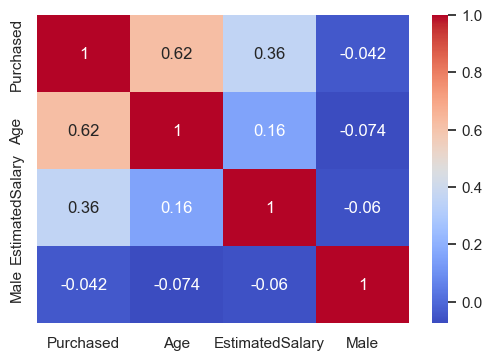

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True, yticklabels=True)
plt.show()

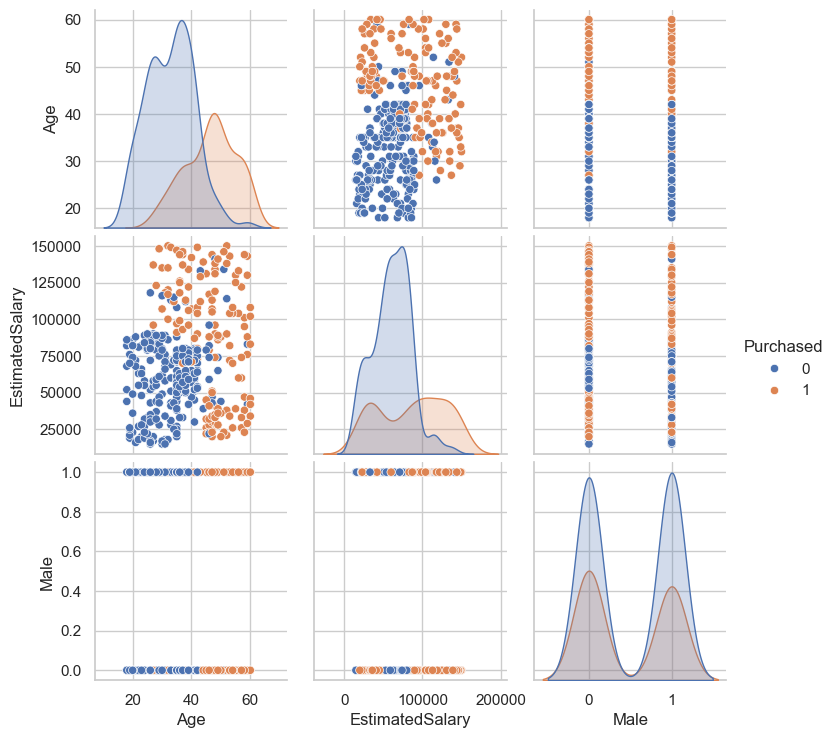

In [33]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Purchased')

## Scaling the features: 

The following step is very important for **Classification** specially for KNN. Because any variable on the larger scale, has a larger effect on the distance between observations. 

In general we need to rescale our variables. If we don't rescale the salary in this example, then the model may always return T or F. 

In this data set, because Male and Purchased are dummy variables, we don't need to standardize it! 

To keep things simple, we are going to rescale the entire dataset at once, and then add back the dummy variables.  

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)

In [35]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,Purchased,Age,EstimatedSalary,Male
0,-0.745936,-1.781797,-1.490046,1.020204
1,-0.745936,-0.253587,-1.460681,1.020204
2,-0.745936,-1.113206,-0.785290,-0.980196
3,-0.745936,-1.017692,-0.374182,-0.980196
4,-0.745936,-1.781797,0.183751,1.020204


In [36]:
df_sc['Male']=df['Male']
df_sc['Purchased']=df['Purchased']
df_sc.head(3)

,Purchased,Age,EstimatedSalary,Male
0,0,-1.781797,-1.490046,1
1,0,-0.253587,-1.460681,1
2,0,-1.113206,-0.785290,0


### Defining the variables and splitting the data

In [38]:
y = df_sc['Purchased']
X = df_sc.drop('Purchased', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [39]:
X_train.head()

,Age,EstimatedSalary,Male
269,0.223978,-0.256722,1
389,0.988083,-1.020209,0
232,0.223978,1.094061,1
89,-0.253587,-0.579736,1
236,0.223978,-0.374182,1


##  KNN Classification with Sklearn

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Fitting KNN classifier to the Training set

KNN_classifier = KNeighborsClassifier(n_neighbors=20)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [42]:
# Predicting the Test set probabilities and classes
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of purchased!

In [43]:
np.round(KNN_classifier.predict_proba(X_test),3)[:5]

array([[0.85, 0.15],
       [1.  , 0.  ],
       [0.2 , 0.8 ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

Let's look at the histogram of probabilities of default:

In [44]:
np.max(y_hat_probs)

0.95

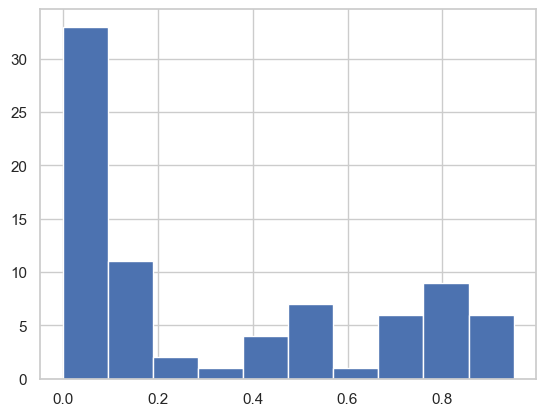

In [45]:
plt.hist(y_hat_probs)
plt.show()

As we saw earlier, the data set is relatively balanced and it seems that a probability threshold of 0.5 is a fair number to work with. However, we are going to construct predictions for threshold =0.3 (to avoid too many false negatives) and 0.7 (to avoid too many false positives) as well. 

**Exercise:** For this social network ads data set, which threshold would make more sense? 

In [46]:
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

In [47]:
# let's put all the predictions together in a data frame.
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})
df_predictions.head()

,y_test,y_hat_probs,y_hat_30,y_hat_70
220,0,0.15,0,0
4,0,0.00,0,0
230,1,0.80,1,1
55,0,0.00,0,0
312,0,0.00,0,0


----

## Performance metrics:

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [49]:
print(confusion_matrix(y_test, y_hat))

[[44  4]
 [ 9 23]]


In [50]:
23/(23+9)

0.71875

#### Built-in classification report

In [51]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        48
           1       0.85      0.72      0.78        32

    accuracy                           0.84        80
   macro avg       0.84      0.82      0.83        80
weighted avg       0.84      0.84      0.83        80



### Defining my own KNN report:

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5, weights='uniform'):
    knn= KNeighborsClassifier(n_neighbors=K, weights=weights)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled
 

In [53]:
my_KNN_report(X_train, y_train, X_test,y_test, K=20, threshold=0.5, weights='uniform')

-----------------------------------------
Accuracy  = 0.8625
Error_rate  = 0.1375
Precision = 0.86
Recall    = 0.78
f1_score  = 0.82
MCC       = 0.71
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,44,4
Actual : positive,7,25


**Exercise**: 
* What will happen to my_KNN_report outputs if threshold=0.3? What about 0.7? 
* Now try weights='distance'. What do you conclude?

In [54]:
X_train.shape

(320, 3)

**Exercise**: Now try K=320 (train size). Why all the predictions are negative?

### ROC and AUC 

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.942


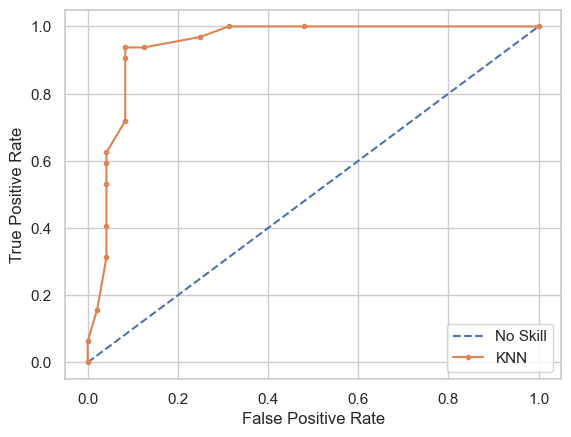

In [55]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [1 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Exercise**: Are you excited about the high AUC? why?

---

##  Cross validation

In KNN, we use cross validation to find the optimal value of K. 

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names
get_scorer_names()


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

In [57]:
# remember we saved our model in an object called "KNN_classifier"
accuracy = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [58]:
1-accuracy

array([0.125   , 0.125   , 0.046875, 0.109375, 0.09375 ])

In [59]:
error_rate=round((1-accuracy).mean(),4)
error_rate

0.1

----------------

## Choosing K
 
Let's start with a simple error rate approach in the test set.

In [60]:
error_rate = []
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    error_rate.append( np.mean(y_test != KNN_i.predict(X_test))) # alternatively we could use, 1- KNN_i.score(X_test, y_test)


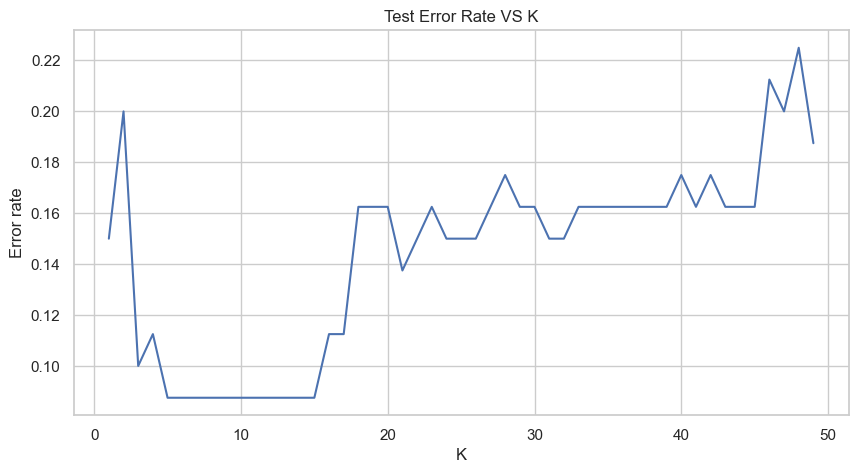

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(y=error_rate, x=range(1,k))
plt.title('Test Error Rate VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

**exercise**: 
* What is wrong if we rely on the error rate in the test set and choose k=5 or 15? cheating?
* What is wrong if we plot Error rate vs K and using the train set? Can you plot that? cheating?
* What is the solution?

In [62]:
error_rate_test = []
error_rate_CV=[]
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    accuracy =  cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))
    error_rate_test.append(np.mean(y_test != KNN_i.predict(X_test)) )
    
optimal_k = pd.DataFrame({'error_rate_CV': error_rate_CV, 'error_rate_test':error_rate_test}, index=range(1,k))

In [63]:
optimal_k.head(10)

,error_rate_CV,error_rate_test
1,0.121875,0.1500
2,0.125000,0.2000
3,0.106250,0.1000
4,0.106250,0.1125
5,0.090625,0.0875
6,0.090625,0.0875
7,0.090625,0.0875
8,0.087500,0.0875
9,0.084375,0.0875
10,0.093750,0.0875


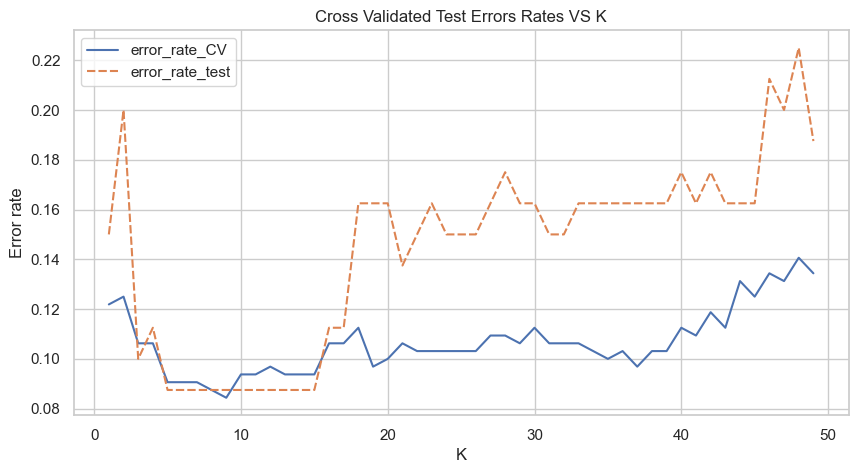

In [64]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

**exercise:** By looking at this graph, What is the optimal value for K now?

Refit the model using the optimal K. 

In [65]:
my_KNN_report(X_train, y_train, X_test,y_test, K=9, threshold=0.5)

-----------------------------------------
Accuracy  = 0.9125
Error_rate  = 0.0875
Precision = 0.88
Recall    = 0.91
f1_score  = 0.89
MCC       = 0.82
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,44,4
Actual : positive,3,29


---
### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [66]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [67]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Fitting KNN classifier to the Training set

In [68]:

KNN_classifier = KNeighborsClassifier(n_neighbors=1)
KNN_classifier.fit(X_train, y_train.values.reshape(-1,))

KNeighborsClassifier(n_neighbors=1)

In [69]:
# Predicting the Test set results
y_pred = KNN_classifier.predict(X_test)

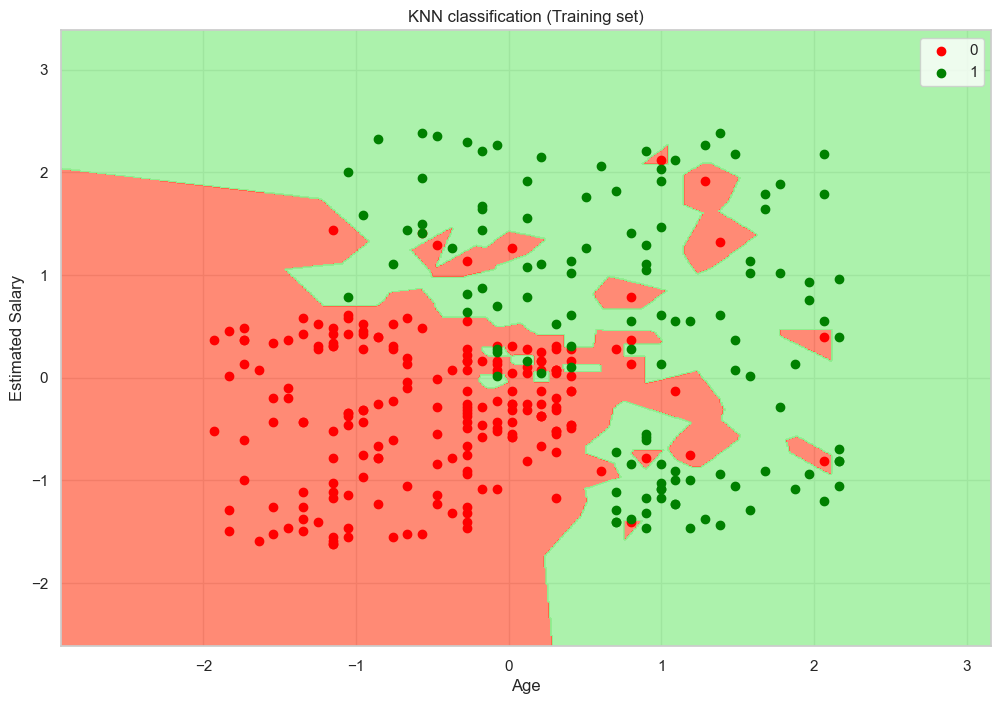

In [70]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , KNN_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

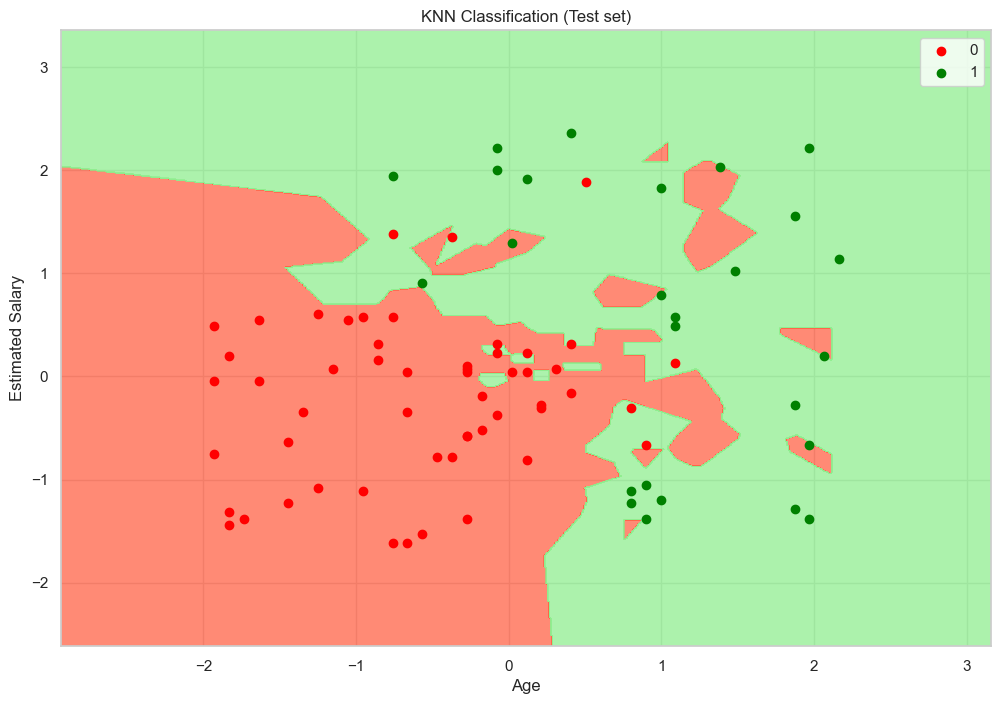

In [71]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, KNN_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [72]:
print(confusion_matrix(y_test, y_pred))

[[45  9]
 [ 3 23]]


**FUN exercise**: now try k=1 and k=300 in the visualization part. Interpret what you observe!

For K=1, what is the accuracy in the train set?

---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [73]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install pycaret

In [74]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.3.2'

In [75]:
df_py = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Social_Network_Ads.csv')

In [76]:
df_py.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [77]:
from pycaret.classification import *


In [78]:
setup(data=df_py,  target='Purchased',ignore_features=['User ID'] , session_id=555, train_size=0.7, preprocess=True, categorical_features= ['Gender'])


,Description,Value
0,Session id,555
1,Target,Purchased
2,Target type,Binary
3,Original data shape,"(400, 5)"
4,Transformed data shape,"(400, 4)"
5,Transformed train set shape,"(280, 4)"
6,Transformed test set shape,"(120, 4)"
7,Ignore features,1
8,Numeric features,2
9,Categorical features,1


In [79]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Create and tune model

In [80]:
knn = create_model(estimator='knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8929,0.9028,0.8000,0.8889,0.8421,0.7614,0.7638
1,0.7857,0.8694,0.5000,0.8333,0.6250,0.4878,0.5190
2,0.8214,0.8222,0.5000,1.0000,0.6667,0.5625,0.6255
3,0.7857,0.8222,0.6000,0.7500,0.6667,0.5116,0.5185
4,0.7500,0.8556,0.5000,0.7143,0.5882,0.4167,0.4303
5,0.7500,0.7583,0.6000,0.6667,0.6316,0.4432,0.4446
6,0.8929,0.8806,0.8000,0.8889,0.8421,0.7614,0.7638
7,0.7143,0.6833,0.5000,0.6250,0.5556,0.3488,0.3536
8,0.7143,0.7111,0.4000,0.6667,0.5000,0.3171,0.3373


In [81]:
# let's get the parameters of knn model
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [82]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.7833,0.8000,0.8000,0.8000,0.6889,0.6889
1,0.8571,0.9000,0.7000,0.8750,0.7778,0.6744,0.6835
2,0.7857,0.8056,0.7000,0.7000,0.7000,0.5333,0.5333
3,0.7857,0.7944,0.8000,0.6667,0.7273,0.5532,0.5594
4,0.8214,0.8500,0.7000,0.7778,0.7368,0.6023,0.6042
5,0.7500,0.6833,0.6000,0.6667,0.6316,0.4432,0.4446
6,0.9286,0.8833,0.9000,0.9000,0.9000,0.8444,0.8444
7,0.6071,0.6667,0.5000,0.4545,0.4762,0.1630,0.1635
8,0.6429,0.6944,0.4000,0.5000,0.4444,0.1860,0.1886


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Plot Model


In [83]:
plot_model(tuned_knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


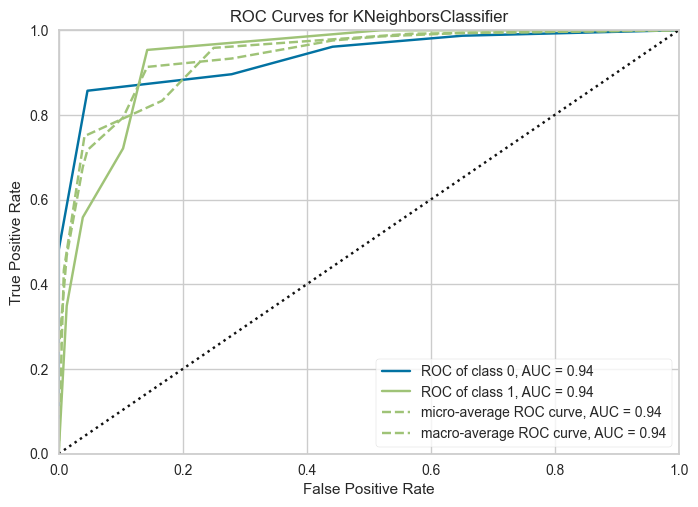

In [84]:
plot_model(tuned_knn, plot = 'auc')

the macro-average ROC curve calculates the TPR and FPR separately for each class, and then averages these values across all classes. Micro-average however, is the weighted average version! 

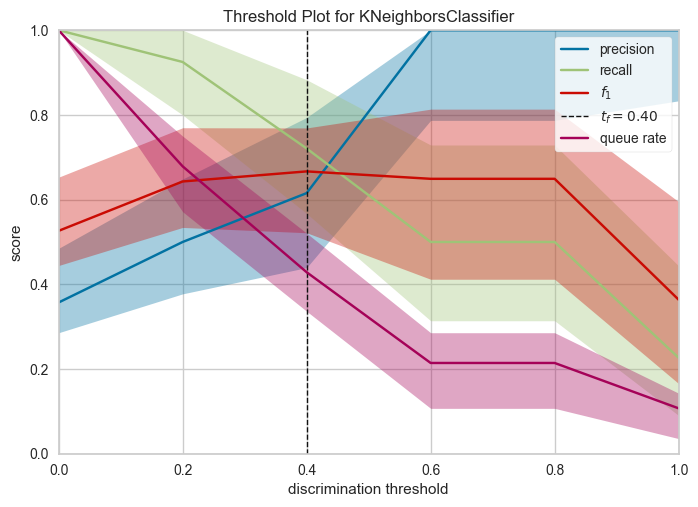

In [85]:
plot_model(tuned_knn, plot = 'threshold')

Optimal Threshold:

You see a vertical line indicating an optimal threshold value that balances different metrics. The optimal threshold is where you might get a balanced performance based on your specific problem requirements.

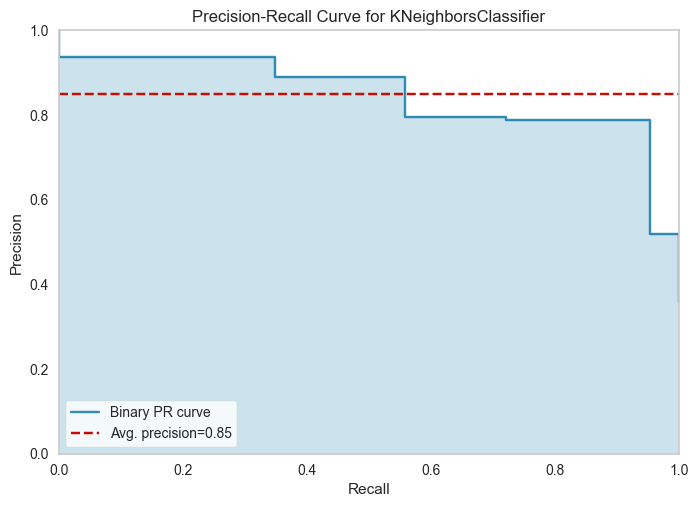

In [86]:
plot_model(tuned_knn, plot = 'pr')

The Average Precision (AP) score is a summary metric that quantifies the quality of the Precision-Recall (PR) curve. It computes the average precision value for recall value over the interval [0, 1]. The AP score provides a single number summary of the information contained in the PR curve, and it's particularly useful when you want to compare different models.

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

The PR chart is useful in such situations because it provides a way to visualize the trade-off between precision and recall for different classification thresholds. Overall, the precision-recall chart is a useful tool for evaluating the performance of binary classification models, especially in situations where the classes are imbalanced or where the cost of false positives and false negatives is different.
Here, the average precision =0.85. An AP score of 0.85 means that, on average, the model has a precision of 0.85 across all recall values.

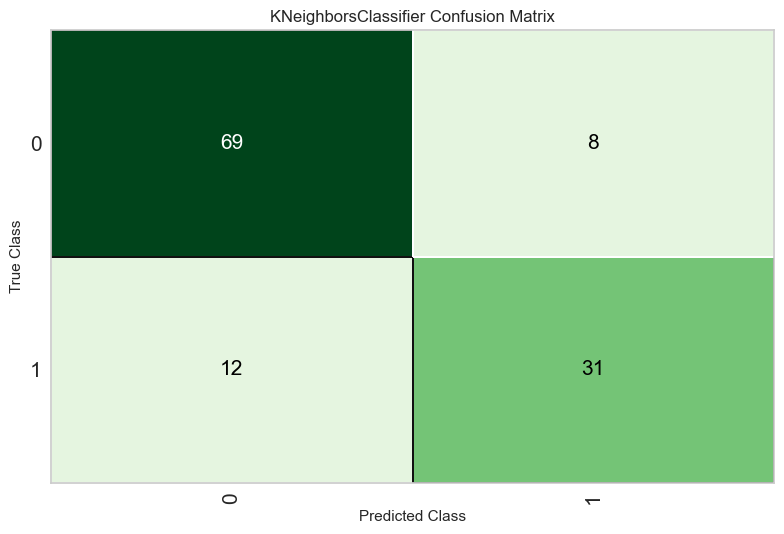

In [87]:
plot_model(tuned_knn, plot = 'confusion_matrix')

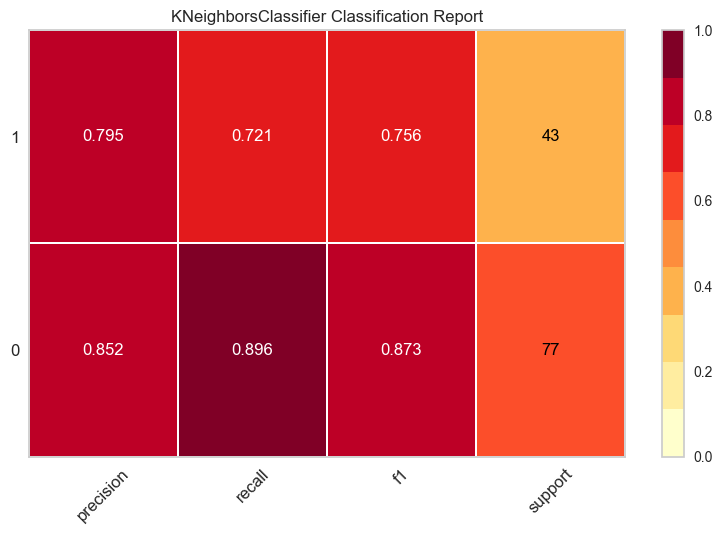

In [88]:
plot_model(tuned_knn, plot = 'class_report')

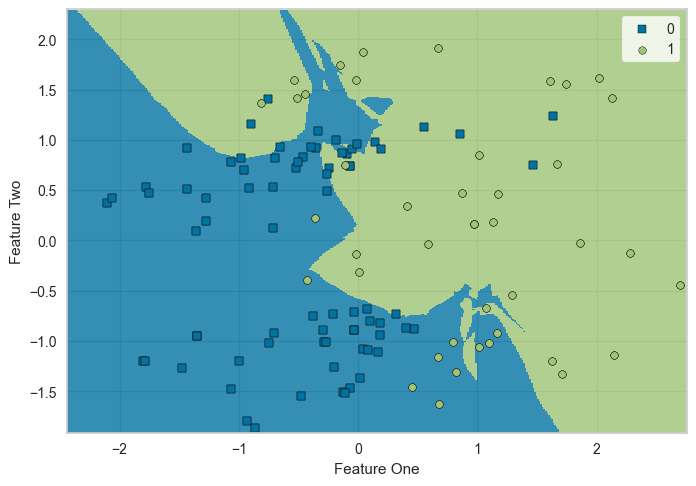

In [89]:
plot_model(tuned_knn, plot = 'boundary')

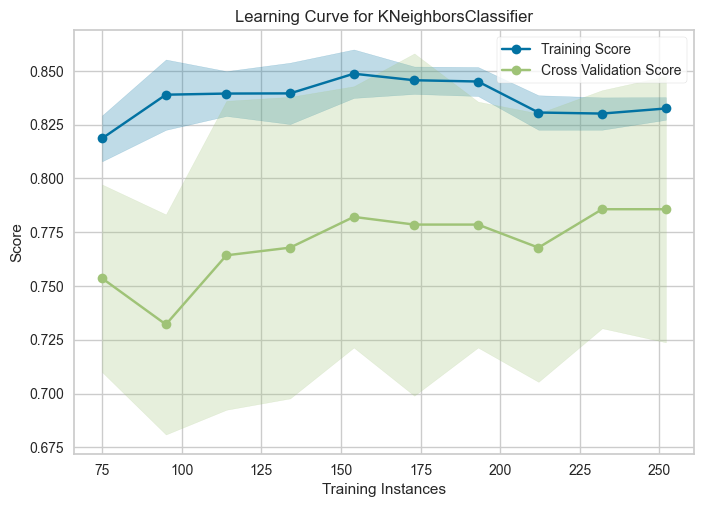

In [90]:
plot_model(tuned_knn, plot = 'learning')

----
Done!

###  Additional links:
1. KNN classification, Sklearn documentation:  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
2. Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance
3. Is accuracy everything? https://towardsdatascience.com/is-accuracy-everything-96da9afd540d
4. BallTree vs KDTree vs Brute force KNN: https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940 
5. ROC Curves and Precision-Recall Curves for imbalanced Classification: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
